In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [31]:
df = pd.read_csv('drug200.csv')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [5]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [8]:
df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [9]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [10]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [27]:
df.duplicated().sum()

0

In [32]:
# rename columns
df.rename(columns={'Na_to_K': 'Sodium_to_Potassium', 'BP': 'Blood_Pressure'}, inplace=True)
df["Sex"].replace({"F": 0, "M": 1}, inplace=True)
df["Sodium_to_Potassium"] = df["Sodium_to_Potassium"].round(0)
df["Sodium_to_Potassium"] = df["Sodium_to_Potassium"].astype(int)

C:\Users\nguye\AppData\Local\Temp\ipykernel_10768\2681377278.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Sex"].replace({"F": 0, "M": 1}, inplace=True)
C:\Users\nguye\AppData\Local\Temp\ipykernel_10768\2681377278.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Sex"].replace({"F": 

In [33]:
df

,Age,Sex,Blood_Pressure,Cholesterol,Sodium_to_Potassium,Drug
0,23,0,HIGH,HIGH,25,drugY
1,47,1,LOW,HIGH,13,drugC
2,47,1,LOW,HIGH,10,drugC
3,28,0,NORMAL,HIGH,8,drugX
4,61,0,LOW,HIGH,18,drugY
...,...,...,...,...,...,...
195,56,0,LOW,HIGH,12,drugC
196,16,1,LOW,HIGH,12,drugC
197,52,1,NORMAL,HIGH,10,drugX
198,23,1,NORMAL,NORMAL,14,drugX


In [35]:
# Thống kê số lượng người thuộc 5 nhóm tuổi cao nhất
age_values = df['Age'].value_counts()
top_age = age_values.head(5)
df_top_age = pd.DataFrame({'Age': top_age.index, 'Count': top_age.values})
df_top_age

,Age,Count
0,47,8
1,23,7
2,28,7
3,49,7
4,39,6


C:\Users\nguye\AppData\Local\Temp\ipykernel_10768\2548763341.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=x, data=data, ax=ax, palette=palatte)
C:\Users\nguye\AppData\Local\Temp\ipykernel_10768\2548763341.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=x, data=data, ax=ax, palette=palatte)
C:\Users\nguye\AppData\Local\Temp\ipykernel_10768\2548763341.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=x, data=data, ax=ax, palette=palatte)
C:\Users\nguye\AppData\Local\Temp\ipykernel_10768\2548763341.py:4: FutureWarning: 

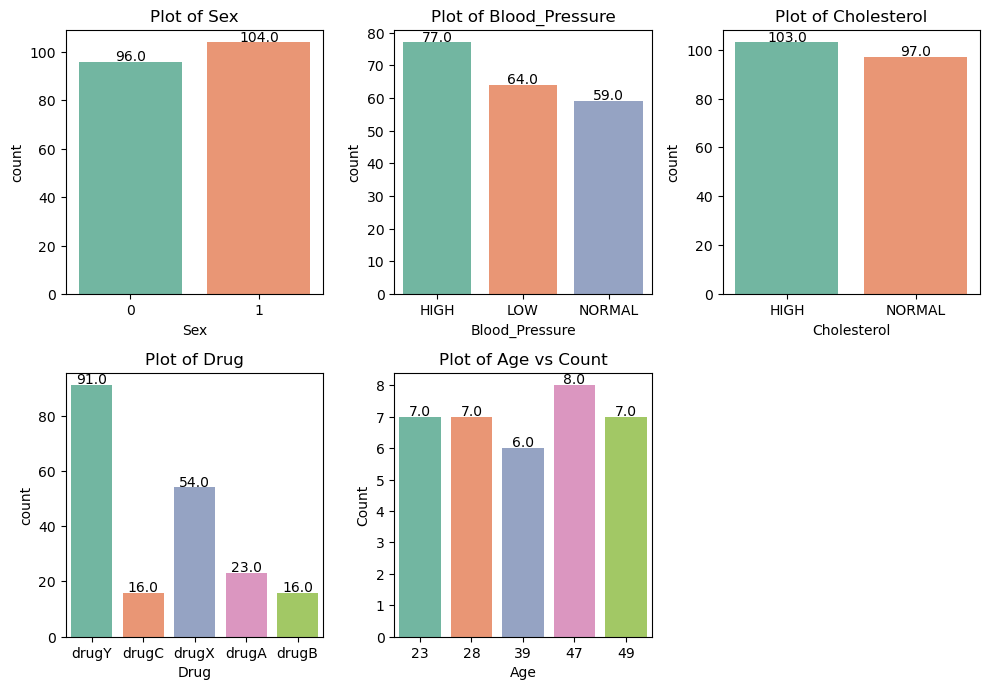

In [38]:
# EDA
def create_plot(ax, x, data, plot_type="count",y=None, palatte="Set2"):
    if plot_type == "count":
        sns.countplot(x=x, data=data, ax=ax, palette=palatte)
    elif plot_type == "bar":
        sns.barplot(x=x, y=y, data=data, ax=ax, palette=palatte)

    ax.set_title(f'Plot of {x}' if plot_type == "count" else f'Plot of {x} vs {y}')

    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='baseline', 
                    color='black', fontsize=10,
                    xytext=(0, 1),
                    textcoords='offset points')
        
# Create a figure and subplots
plt.figure(figsize=(10, 10))

# Define plot congfigurations
plot_configs = [
    {"x": "Sex", "plot_type": "count", "data": df},
    {"x": "Blood_Pressure", "plot_type": "count", "data": df},
    {"x": "Cholesterol", "plot_type": "count", "data": df},
    {"x": "Drug", "plot_type": "count", "data": df},
    {"x": "Age", "plot_type": "bar", "data": df_top_age, "y": "Count"}
]

# Create subplots
for i, config in enumerate(plot_configs):
    ax = plt.subplot(3, 3, i+1)
    create_plot(ax, **config)

plt.tight_layout()
plt.show()

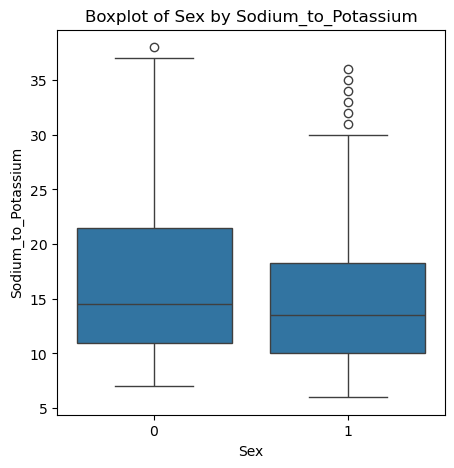

In [40]:
# Checking outliers detection through boxplot
plt.figure(figsize=(5, 5))
sns.boxplot(x="Sex", y="Sodium_to_Potassium", data=df)
plt.title("Boxplot of Sex by Sodium_to_Potassium")
plt.show()

In [41]:
# Feature and target
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

x

,Age,Sex,Blood_Pressure,Cholesterol,Sodium_to_Potassium
0,23,0,HIGH,HIGH,25
1,47,1,LOW,HIGH,13
2,47,1,LOW,HIGH,10
3,28,0,NORMAL,HIGH,8
4,61,0,LOW,HIGH,18
...,...,...,...,...,...
195,56,0,LOW,HIGH,12
196,16,1,LOW,HIGH,12
197,52,1,NORMAL,HIGH,10
198,23,1,NORMAL,NORMAL,14


In [42]:
y

0      drugY
1      drugC
2      drugC
3      drugX
4      drugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object

In [44]:
# OneHotEncoder
onehot_encoder_sex = OneHotEncoder(sparse_output=False)
onehot_encoder = onehot_encoder_sex.fit_transform(x[["Sex"]])
onehot_df = pd.DataFrame(onehot_encoder, columns=onehot_encoder_sex.get_feature_names_out(["Sex"]))
x = pd.concat([x, onehot_df], axis=1)
x = x.drop("Sex", axis=1)

# LabelEncoder
labelled_encoder_blood_pressure = LabelEncoder()
labelled_encoder_cholesterol = LabelEncoder()
x["Blood_Pressure"] = labelled_encoder_blood_pressure.fit_transform(x["Blood_Pressure"])
x["Cholesterol"] = labelled_encoder_cholesterol.fit_transform(x["Cholesterol"])

# Show features data
x

,Age,Blood_Pressure,Cholesterol,Sodium_to_Potassium,Sex_0,Sex_1
0,23,0,0,25,1.0,0.0
1,47,1,0,13,0.0,1.0
2,47,1,0,10,0.0,1.0
3,28,2,0,8,1.0,0.0
4,61,1,0,18,1.0,0.0
...,...,...,...,...,...,...
195,56,1,0,12,1.0,0.0
196,16,1,0,12,0.0,1.0
197,52,2,0,10,0.0,1.0
198,23,2,1,14,0.0,1.0


In [45]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

In [46]:
X_train

,Age,Blood_Pressure,Cholesterol,Sodium_to_Potassium,Sex_0,Sex_1
2,47,1,0,10,0.0,1.0
77,26,0,1,19,1.0,0.0
46,37,0,0,13,1.0,0.0
187,47,0,0,10,0.0,1.0
191,23,0,0,8,0.0,1.0
...,...,...,...,...,...,...
106,22,2,0,12,0.0,1.0
14,50,2,0,13,1.0,0.0
92,29,0,0,29,1.0,0.0
179,67,2,0,16,1.0,0.0


In [47]:
X_test

,Age,Blood_Pressure,Cholesterol,Sodium_to_Potassium,Sex_0,Sex_1
95,36,1,1,11,0.0,1.0
15,16,0,1,16,1.0,0.0
30,18,2,1,9,1.0,0.0
158,59,1,0,10,1.0,0.0
128,47,1,1,34,0.0,1.0
...,...,...,...,...,...,...
113,65,1,1,14,1.0,0.0
26,31,0,0,30,0.0,1.0
139,69,2,0,10,1.0,0.0
100,31,0,1,12,0.0,1.0


In [48]:
dtc = DecisionTreeClassifier(criterion="entropy", max_depth=6, max_leaf_nodes=10)

In [49]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, max_leaf_nodes=10)

In [50]:
dtc.classes_

array(['drugA', 'drugB', 'drugC', 'drugX', 'drugY'], dtype=object)

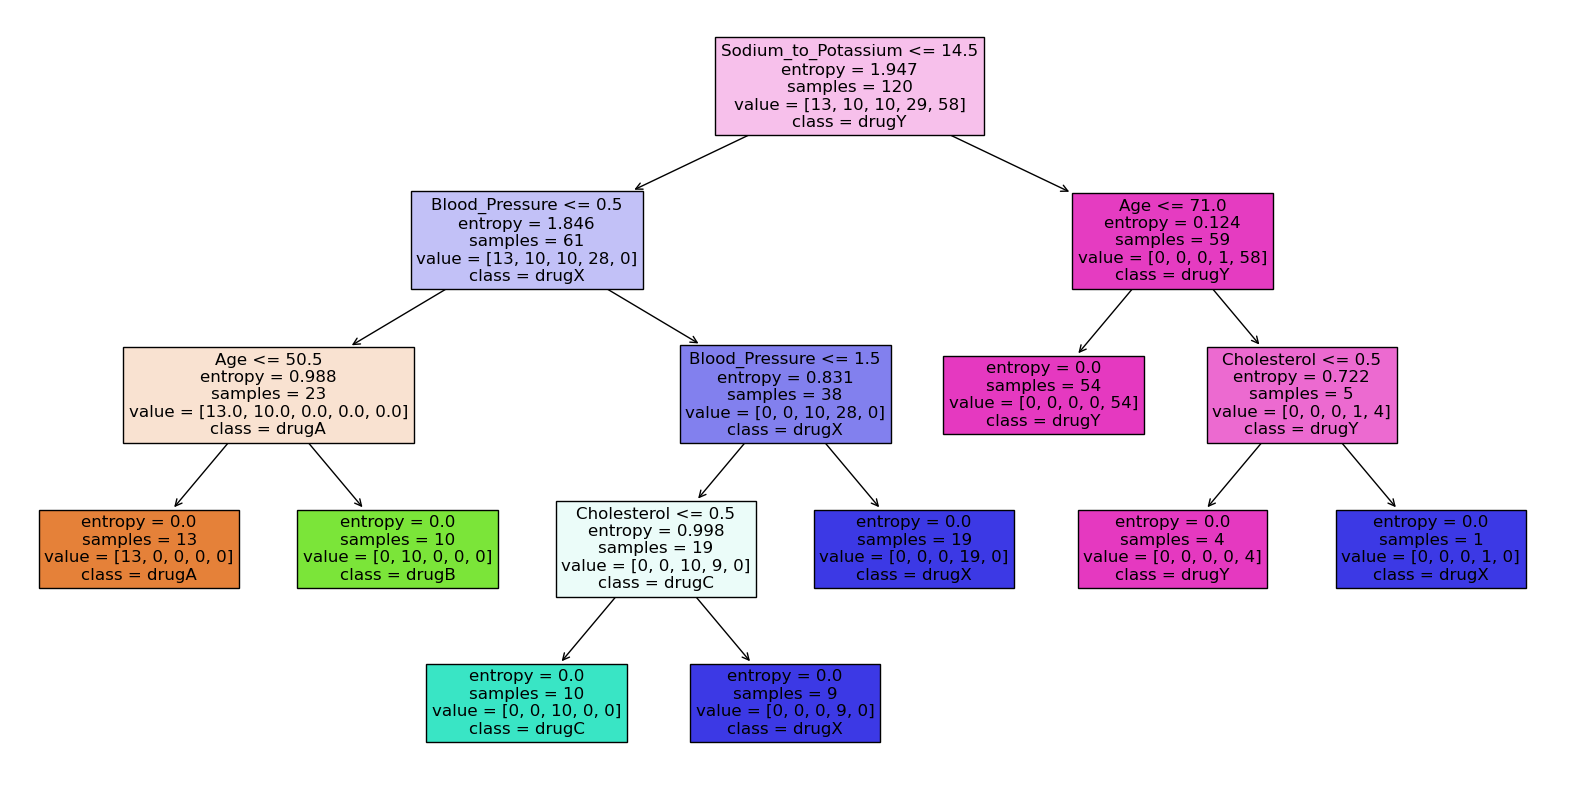

In [51]:
from sklearn.tree import plot_tree

feature_cols = X_train.columns

plt.figure(figsize=(20, 10))
plot_tree(dtc, feature_names=feature_cols, class_names=dtc.classes_, filled=True, fontsize=12)
plt.show()

In [53]:
# Accuracy Score
y_test_pred = dtc.predict(X_test)

print("Accuracy:", 100*metrics.accuracy_score(y_test, y_test_pred), "%")

Accuracy: 98.75 %


In [55]:
# Tạo confusion matrix
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_test_pred)

cf_matrix

array([[10,  0,  0,  0,  0],
       [ 0,  6,  0,  0,  0],
       [ 0,  0,  6,  0,  0],
       [ 0,  0,  0, 25,  0],
       [ 0,  0,  0,  1, 32]], dtype=int64)

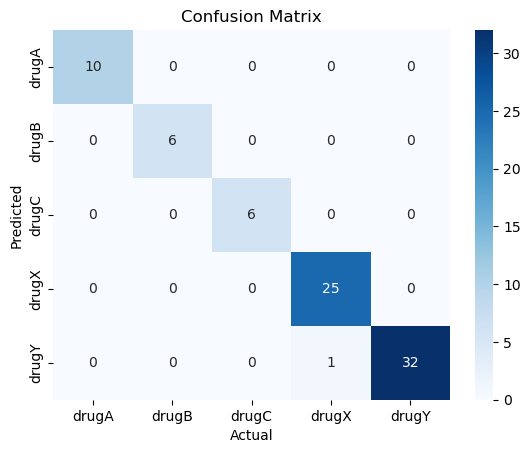

In [56]:
# Plot confusion matrix
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=dtc.classes_, yticklabels=dtc.classes_)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [57]:
# Performance metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score

# Accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_test_pred, average=None)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_test_pred, average=None)
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_test, y_test_pred, average=None)
print("F1 Score:", f1)

# F0.5 Score
f0_5 = fbeta_score(y_test, y_test_pred, beta=0.5, average=None)
print("F0.5 Score:", f0_5)

# F2 Score
f2 = fbeta_score(y_test, y_test_pred, beta=2, average=None)
print("F2 Score:", f2)

Accuracy: 0.9875
Precision: [1.         1.         1.         0.96153846 1.        ]
Recall: [1.         1.         1.         1.         0.96969697]
F1 Score: [1.         1.         1.         0.98039216 0.98461538]
F0.5 Score: [1.         1.         1.         0.96899225 0.99378882]
F2 Score: [1.         1.         1.         0.99206349 0.97560976]


In [58]:
# Micro Precision
micro_precision = precision_score(y_test, y_test_pred, average='micro')
print("Micro Precision:", micro_precision)

Micro Precision: 0.9875


In [59]:
# Macro Precision
macro_precision = precision_score(y_test, y_test_pred, average='macro')
print("Macro Precision:", macro_precision)

Macro Precision: 0.9923076923076923


In [63]:
from sklearn.metrics import classification_report
target_names = dtc.classes_
print(classification_report(y_test, y_test_pred, target_names=target_names))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00        10
       drugB       1.00      1.00      1.00         6
       drugC       1.00      1.00      1.00         6
       drugX       0.96      1.00      0.98        25
       drugY       1.00      0.97      0.98        33

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [71]:
# Prediction 
age = 32
blood = "HIGH"
blood_scale = labelled_encoder_blood_pressure.transform([blood])

cholesterol = "NORMAL"
cholesterol_scale = labelled_encoder_cholesterol.transform([cholesterol])

sodium_to_potassium = 13

sex = 0 
sex_scale = onehot_encoder_sex.transform([[sex]])

sex_scale = sex_scale.flatten()

# Define the feature sample
feature_sample = np.array([age, blood_scale[0], cholesterol_scale[0], sodium_to_potassium, sex_scale[0], sex_scale[1]])

# Predict the class
y_sample_pred = dtc.predict([feature_sample])
y_sample_pred

c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['drugA'], dtype=object)